<a href="https://colab.research.google.com/github/maxim371/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_Unit_4_Sprint_Challenge_2_DSPT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
- **Input Layer:**
- **Hidden Layer:**
- **Output Layer:**
- **Activation Function:**

###Neuron: also known as nodes receive inputs and pass on their signal to the next layer of nodes if a certain threshold is reached
###Input Layer: is what receives input from our dataset
###Hidden Layer:These are layers after the input layer. We don't directly interact with them. They cannot be accessed except through the input layer
###Output Layer: This is the final layer. This layeer outputs a vector of values that is in a format that is suitable fr the type of problem that we're trying to address.
###Activation function: modifies the output value into a format that makes sense for our context eg. Relu, sigmoid



Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

Backpropagation is an algorithm that is used to update each weights in a network so that they cause the actual output to be closer to the target output, thereby minimizing the error for each output neuron and the network as a whole. Backpropagation uses a technique called gradient descent to minimize the value of the error function.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

###Perceptron is just a single node or neuron of a neural network with nothing else. it can take any number of inputs and spit out an output. 
The process of making a prediction is simple, It takes each of the input values, multiplies each of them by weight, sums all of these products up, and then passes the sum through what is called an 'activation function' the result of which is the final value


<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)
# print(X)
# print(y)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='relu'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(X,y,epochs=20)


Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 3.4708 - accuracy: 0.6067
Epoch 2/20
10/10 [==============================] - 0s 1ms/step - loss: 3.5510 - accuracy: 0.6167
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 3.5463 - accuracy: 0.6200
Epoch 4/20
10/10 [==============================] - 0s 1ms/step - loss: 3.2925 - accuracy: 0.6200
Epoch 5/20
10/10 [==============================] - 0s 1ms/step - loss: 3.5901 - accuracy: 0.6267
Epoch 6/20
10/10 [==============================] - 0s 1ms/step - loss: 3.2829 - accuracy: 0.6300
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 3.6590 - accuracy: 0.6333
Epoch 8/20
10/10 [==============================] - 0s 1ms/step - loss: 3.2506 - accuracy: 0.6367
Epoch 9/20
10/10 [==============================] - 0s 1ms/step - loss: 3.2496 - accuracy: 0.6433
Epoch 10/20
10/10 [==============================] - 0s 1ms/step - loss: 3.4818 - accuracy: 0.6533
Epoch 11/20
10/10 [

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [65]:
model2 = Sequential()
model2.add(Dense(32, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h2 = model2.fit(X,y, epochs=20)

Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5067
Epoch 2/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5800
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6433
Epoch 4/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.7067
Epoch 5/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6331 - accuracy: 0.7633
Epoch 6/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7767
Epoch 7/20
10/10 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.8167
Epoch 8/20
10/10 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.8367
Epoch 9/20
10/10 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.8500
Epoch 10/20
10/10 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.8733
Epoch 11/20
10/10 [

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


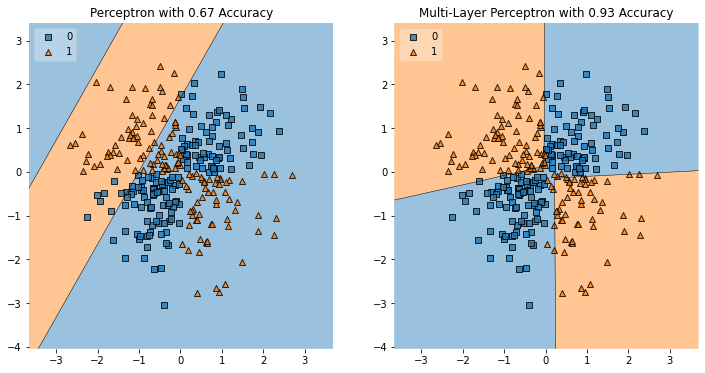

In [66]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

###The additional hidden layers and weights makes the multi layer perceptron more robust to solve complex data such as images

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0


In [108]:
X = df.drop('target', axis=1)
y = df['target']
# print(X)
# print(y)
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X,y, epochs=25)

Epoch 1/25
10/10 [==============================] - 0s 2ms/step - loss: 4.3517 - accuracy: 0.5776
Epoch 2/25
10/10 [==============================] - 0s 2ms/step - loss: 1.8864 - accuracy: 0.6106
Epoch 3/25
10/10 [==============================] - 0s 1ms/step - loss: 1.4231 - accuracy: 0.6700
Epoch 4/25
10/10 [==============================] - 0s 1ms/step - loss: 1.2654 - accuracy: 0.6766
Epoch 5/25
10/10 [==============================] - 0s 1ms/step - loss: 1.2306 - accuracy: 0.6898
Epoch 6/25
10/10 [==============================] - 0s 1ms/step - loss: 1.1534 - accuracy: 0.6931
Epoch 7/25
10/10 [==============================] - 0s 1ms/step - loss: 1.1298 - accuracy: 0.6766
Epoch 8/25
10/10 [==============================] - 0s 2ms/step - loss: 1.1235 - accuracy: 0.6865
Epoch 9/25
10/10 [==============================] - 0s 1ms/step - loss: 1.1186 - accuracy: 0.6766
Epoch 10/25
10/10 [==============================] - 0s 1ms/step - loss: 1.0345 - accuracy: 0.6898
Epoch 11/25
10/10 [

##Hyperparameter Tuning

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [0]:
X = df.drop('target', axis=1)
y = df['target']
# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60],
              'epochs': [25]}

In [116]:
# Create Grid Search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid.fit(X, y)
grid.score(X,y)

0.7623762488365173

###Another Hyperparameter

In [0]:
X = df.drop('target', axis=1)
y = df['target']
# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 50, 70, 100],
              'epochs': [30]}

In [119]:
# Create Grid Search
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid.fit(X, y)
grid.score(X,y)

0.8151814937591553